# Import Data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['PG', '^GSPC']
start_date = '1995-01-01'

reg_data = pd.DataFrame()

for t in tickers:      
    reg_data[t] = yf.download(t, start=start_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
reg_data

,PG,^GSPC
Date,,
1995-01-03,7.441164,459.109985
1995-01-04,7.381517,460.709991
1995-01-05,7.277136,460.339996
1995-01-06,7.292046,460.679993
1995-01-09,7.262221,460.829987
...,...,...
2024-12-24,168.940002,6040.040039
2024-12-26,170.160004,6037.589844
2024-12-27,169.529999,5970.839844


In [3]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7552 entries, 1995-01-03 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7552 non-null   float64
 1   ^GSPC   7552 non-null   float64
dtypes: float64(2)
memory usage: 177.0 KB


# Calculate Simple Return

In [4]:
reg_returns = (reg_data / reg_data.shift(1))-1

In [5]:
reg_returns

,PG,^GSPC
Date,,
1995-01-03,NaN,NaN
1995-01-04,-0.008016,0.003485
1995-01-05,-0.014141,-0.000803
1995-01-06,0.002049,0.000739
1995-01-09,-0.004090,0.000326
...,...,...
2024-12-24,0.004937,0.011043
2024-12-26,0.007222,-0.000406
2024-12-27,-0.003702,-0.011056


# Univariate Regression

In [6]:
X = reg_returns['^GSPC']
Y = reg_returns['PG']

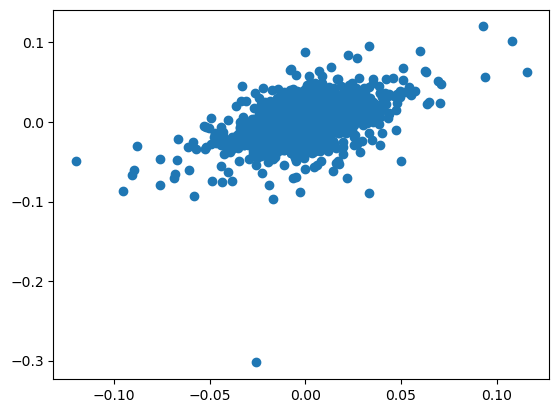

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
plt.show()

In [8]:
min_gspc = reg_returns['^GSPC'].min()
max_gspc = reg_returns['^GSPC'].max()
min_pg = reg_returns['PG'].min()
max_pg = reg_returns['PG'].max()

print("Minimum GSPC:", min_gspc)
print("Maximum GSPC:", max_gspc)
print("Minimum PG:", min_pg)
print("Maximum PG:", max_pg)

Minimum GSPC: -0.11984055240393443
Maximum GSPC: 0.11580036951513706
Minimum PG: -0.302358993758275
Maximum PG: 0.12009029200825072


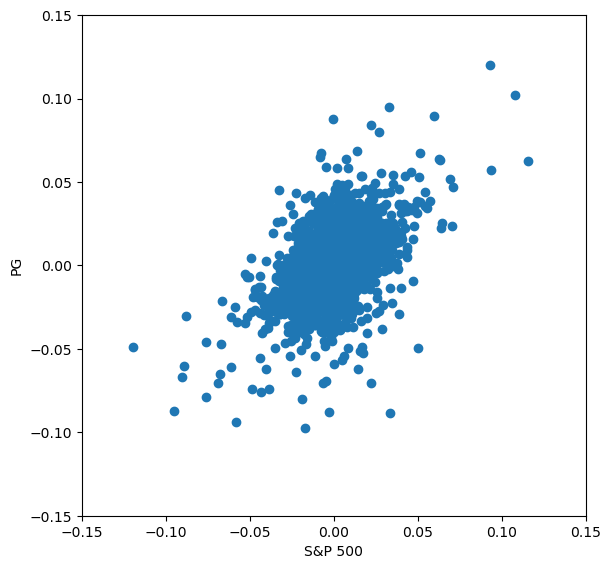

In [9]:
plt.figure(figsize=(6.5, 6.5))
plt.scatter(X,Y)
plt.axis([-0.15, 0.15, -0.15, 0.15])
plt.xlabel('S&P 500')
plt.ylabel('PG')
plt.show()

# Clean Data (remove NaN)

In [10]:
import numpy as np

print(X.isnull().sum())
print(Y.isnull().sum())
print(np.isinf(X).sum())
print(np.isinf(Y).sum()) 

1
1
0
0


In [11]:
X = X.dropna()
Y = Y.dropna()

In [12]:
print(X.isnull().sum())
print(Y.isnull().sum())
print(np.isinf(X).sum())
print(np.isinf(Y).sum()) 

0
0
0
0


# Create Regression

In [13]:
import statsmodels.api as sm

# Assign a constant (newly obtained information) as X1
X1 = sm.add_constant(X)

# Assign Ordinary Least Squared Regression (OLS) as reg
reg = sm.OLS(Y, X1).fit()

In [14]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PG   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2314.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:24:20   Log-Likelihood:                 22659.
No. Observations:                7551   AIC:                        -4.531e+04
Df Residuals:                    7549   BIC:                        -4.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.017      0.044    7.87e-06       0.001
^GSPC          0.5612      0.012     48.108      0.000       0.538       0.584
==============================================================================
Omnibus:                     4675.052   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           771383.774
Skew:                          -1.947   Prob(JB):                         0.00
Kurtosis:                      52.362   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Alpha, Beta and R^2

In [15]:
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [16]:
slope

0.5612284877476675

In [17]:
intercept

0.0002796291481054506

In [18]:
# Raise to the power of 2 to get R square
r_value ** 2

0.23464067652002724

In [19]:
p_value

0.0

In [20]:
std_err

0.011666109066154411